<a href="https://colab.research.google.com/github/Gitinitty-5/Python-Projects/blob/main/Oral_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Import the RandomForestClassifier

##Load & Examine Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving oral_cancer_prediction_dataset.xlsx to oral_cancer_prediction_dataset.xlsx


In [4]:
import pandas as pd
df = pd.read_excel("oral_cancer_prediction_dataset.xlsx")
df.head()

,ID,country,gender,age,tobacco_use,alcohol_use,socioeconomic_status,diagnosis_stage,treatment_type,survival_rate,hpv_related
0,1,Ethiopia,Male,34,1,1,High,Early,Radiotherapy,0.826235,0
1,2,Turkey,Female,84,1,1,High,Moderate,Radiotherapy,0.376607,0
2,3,Turkey,Female,62,1,1,Middle,Early,Radiotherapy,0.736296,1
3,4,Tanzania,Male,48,1,1,Middle,Moderate,Combination,0.786118,0
4,5,France,Male,26,1,1,Middle,Early,Radiotherapy,0.830411,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   country               160292 non-null  object 
 2   gender                160292 non-null  object 
 3   age                   160292 non-null  int64  
 4   tobacco_use           160292 non-null  int64  
 5   alcohol_use           160292 non-null  int64  
 6   socioeconomic_status  160292 non-null  object 
 7   diagnosis_stage       160292 non-null  object 
 8   treatment_type        160292 non-null  object 
 9   survival_rate         160292 non-null  float64
 10  hpv_related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.5+ MB


In [6]:
df.describe()

,ID,age,tobacco_use,alcohol_use,survival_rate,hpv_related
count,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,80146.500000,46.564102,0.601677,0.499638,0.599990,0.298543
std,46272.459012,20.594431,0.489554,0.500001,0.172882,0.457620
min,1.000000,20.000000,0.000000,0.000000,0.300002,0.000000
25%,40073.750000,29.000000,0.000000,0.000000,0.450680,0.000000
50%,80146.500000,39.000000,1.000000,0.000000,0.599586,0.000000
75%,120219.250000,64.000000,1.000000,1.000000,0.749291,1.000000
max,160292.000000,89.000000,1.000000,1.000000,0.899992,1.000000


In [7]:
##check for nulls
df.isnull().sum()

,0
ID,0
country,0
gender,0
age,0
tobacco_use,0
alcohol_use,0
socioeconomic_status,0
diagnosis_stage,0
treatment_type,0
survival_rate,0


In [8]:
#Investigate elements in each feature
for column in df:
  unique_values = np.unique(df[column])  # Indented properly
  nr_values = len(unique_values)  # Indented properly
  if len(unique_values) <= 10:
    print("The number of values for feature '{}' is: {}.....{}".format(column, nr_values, unique_values))
  else:
    print("The number of values for feature '{}' is: {}".format(column, nr_values))

The number of values for feature 'ID' is: 160292
The number of values for feature 'country' is: 30
The number of values for feature 'gender' is: 2.....['Female' 'Male']
The number of values for feature 'age' is: 70
The number of values for feature 'tobacco_use' is: 2.....[0 1]
The number of values for feature 'alcohol_use' is: 2.....[0 1]
The number of values for feature 'socioeconomic_status' is: 3.....['High' 'Low' 'Middle']
The number of values for feature 'diagnosis_stage' is: 3.....['Early' 'Late' 'Moderate']
The number of values for feature 'treatment_type' is: 5.....['Chemotherapy' 'Combination' 'Palliative' 'Radiotherapy' 'Surgery']
The number of values for feature 'survival_rate' is: 160292
The number of values for feature 'hpv_related' is: 2.....[0 1]


In [9]:
numerical_columns=df.select_dtypes(include="number").columns.to_list()
categorical_columns=df.select_dtypes(exclude="number").columns.to_list()
print(f"numerical columns in the data: {numerical_columns}")
print(f"categorical columns in the data:{categorical_columns}")

numerical columns in the data: ['ID', 'age', 'tobacco_use', 'alcohol_use', 'survival_rate', 'hpv_related']
categorical columns in the data:['country', 'gender', 'socioeconomic_status', 'diagnosis_stage', 'treatment_type']


##Data Visualization

In [10]:
# Count occurrences of 0 and 1 separately for 'hpv_related' in each country
hpv_counts = df.groupby(['country', 'hpv_related']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
hpv_counts.columns = ['country', 'hpv_not_related (0)', 'hpv_related (1)']

# Sort by the number of HPV-related cases (1s) in descending order
hpv_counts_sorted = hpv_counts.sort_values(by='hpv_related (1)', ascending=False)

# Display the final DataFrame
print(hpv_counts_sorted)

           country  hpv_not_related (0)  hpv_related (1)
4         DR Congo                 3714             1686
8          Germany                 3711             1673
18        Pakistan                 3775             1647
28   United States                 3772             1639
27  United Kingdom                 3667             1639
17         Nigeria                 3771             1630
12           Italy                 3679             1618
0       Bangladesh                 3786             1616
22     South Korea                 3748             1608
19     Philippines                 3687             1603
2            China                 3731             1601
11            Iran                 3760             1601
14           Kenya                 3723             1597
29         Vietnam                 3855             1597
26          Turkey                 3792             1596
23           Spain                 3674             1589
6         Ethiopia             

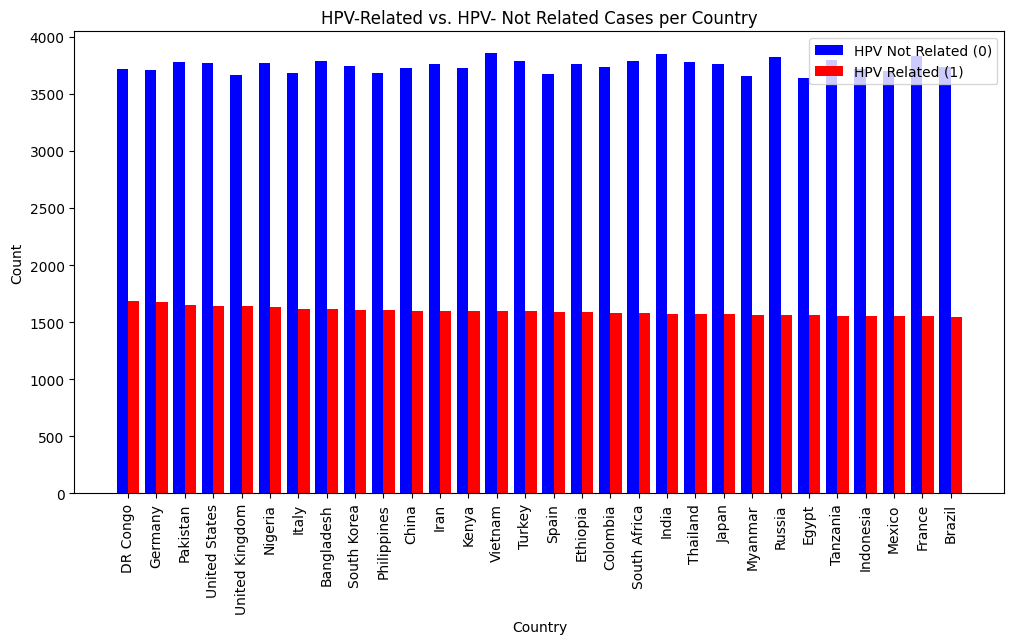

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(hpv_counts_sorted['country']))

# Create bars for '0' (HPV not related) and '1' (HPV related)
plt.bar(x - bar_width/2, hpv_counts_sorted['hpv_not_related (0)'], width=bar_width, label='HPV Not Related (0)', color='blue')
plt.bar(x + bar_width/2, hpv_counts_sorted['hpv_related (1)'], width=bar_width, label='HPV Related (1)', color='red')

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("HPV-Related vs. HPV- Not Related Cases per Country")
plt.xticks(ticks=x, labels=hpv_counts_sorted['country'], rotation=90)  # Rotate country names for readability
plt.legend()

# Show the plot
plt.show()

In [12]:
##value counts of gender
df['gender'].value_counts().reset_index()

,gender,count
0,Male,107392
1,Female,52900


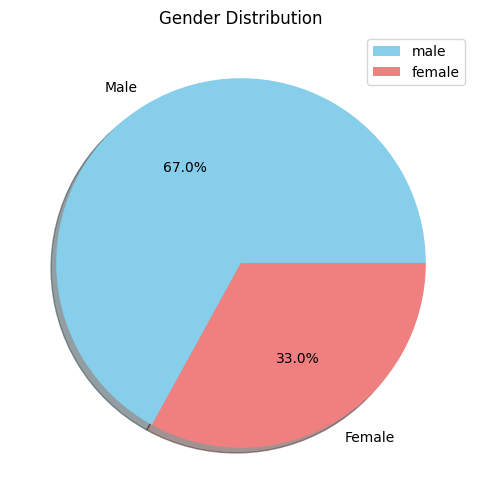

In [13]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True, colors=["skyblue", "lightcoral"])
plt.title("Gender Distribution")
plt.legend(labels=["male","female"])
plt.ylabel("")
plt.show()

In [14]:
##value counts of socioeconomic status
df['socioeconomic_status'].value_counts().reset_index()

,socioeconomic_status,count
0,Low,79927
1,Middle,56161
2,High,24204


In [15]:
#value counts of diagnosis stage
df['diagnosis_stage'].value_counts().reset_index()

,diagnosis_stage,count
0,Moderate,63939
1,Early,48287
2,Late,48066


In [16]:
#value counts of treatment type
df['treatment_type'].value_counts().reset_index()

,treatment_type,count
0,Surgery,48171
1,Radiotherapy,40237
2,Chemotherapy,31996
3,Combination,24027
4,Palliative,15861


In [17]:
ctry_socioeconomic_counts= df.groupby('country')['socioeconomic_status'].value_counts().reset_index(name='count')
ctry_socioeconomic_counts

,country,socioeconomic_status,count
0,Bangladesh,Low,2708
1,Bangladesh,Middle,1898
2,Bangladesh,High,796
3,Brazil,Low,2595
4,Brazil,Middle,1869
...,...,...,...
85,United States,Middle,1849
86,United States,High,786
87,Vietnam,Low,2678
88,Vietnam,Middle,1904


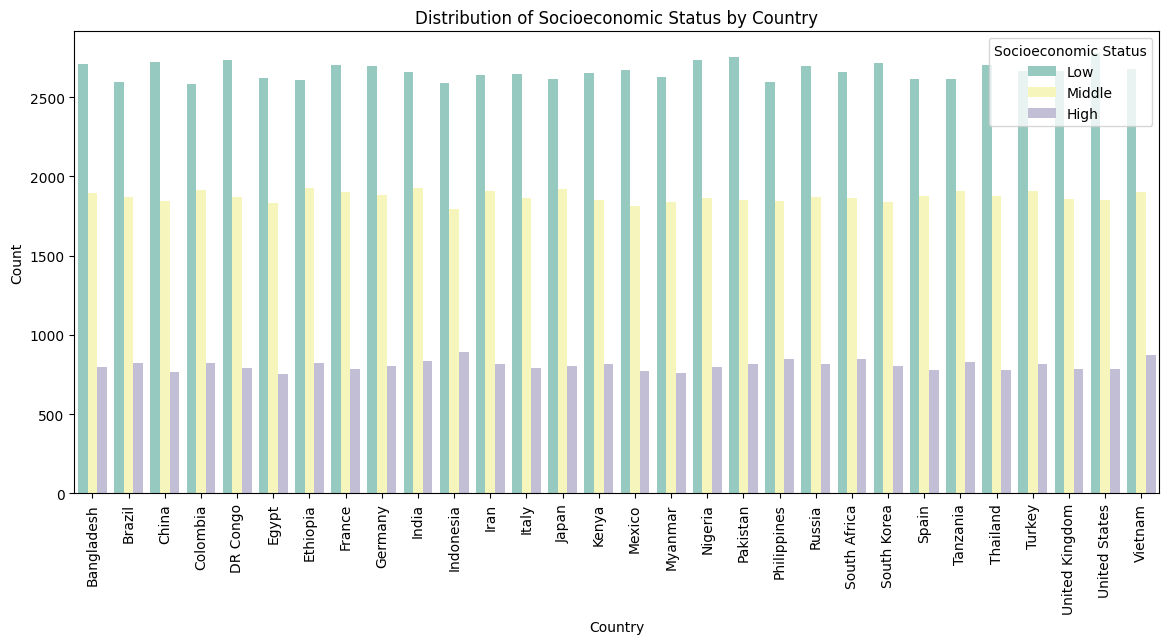

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create bar plot
sns.barplot(
    data=ctry_socioeconomic_counts,
    x="country",
    y="count",
    hue="socioeconomic_status",
    palette="Set3"
)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Socioeconomic Status by Country")
plt.xticks(rotation=90)  # Rotate country names for readability
plt.legend(title="Socioeconomic Status")

# Show the plot
plt.show()

In [19]:
ctry_diagnosis_counts= df.groupby('country')['diagnosis_stage'].value_counts().reset_index(name='count')
ctry_diagnosis_counts

,country,diagnosis_stage,count
0,Bangladesh,Moderate,2090
1,Bangladesh,Early,1659
2,Bangladesh,Late,1653
3,Brazil,Moderate,2144
4,Brazil,Early,1624
...,...,...,...
85,United States,Early,1659
86,United States,Late,1580
87,Vietnam,Moderate,2202
88,Vietnam,Late,1675


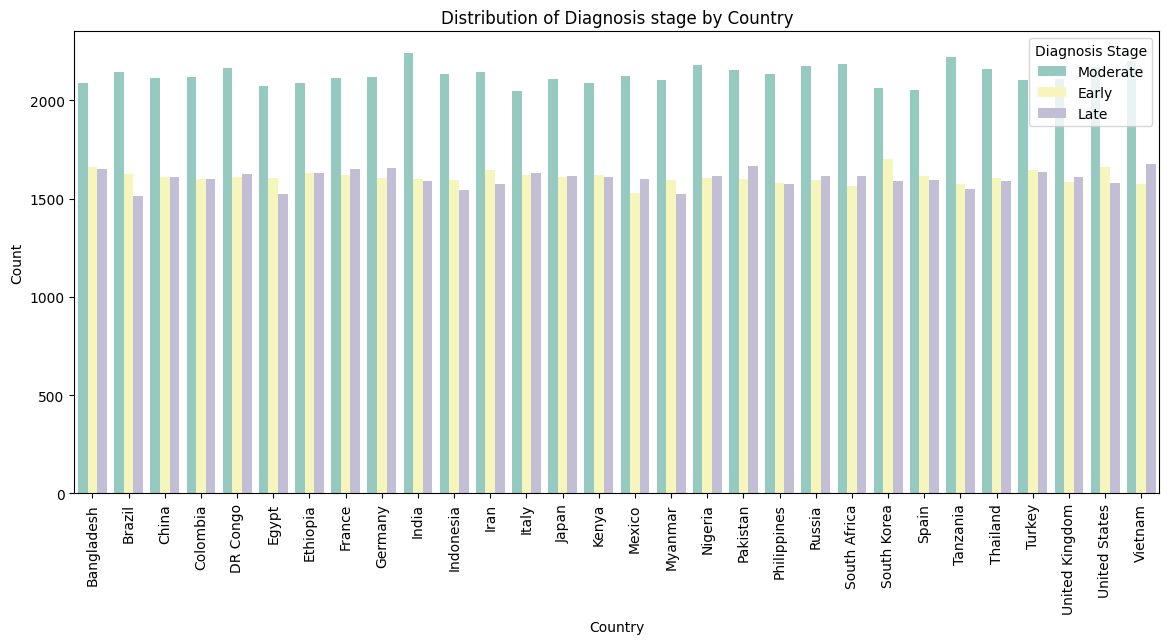

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create bar plot
sns.barplot(
    data=ctry_diagnosis_counts,
    x="country",
    y="count",
    hue="diagnosis_stage",
    palette="Set3"
)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of Diagnosis stage by Country")
plt.xticks(rotation=90)  # Rotate country names for readability
plt.legend(title="Diagnosis Stage")

# Show the plot
plt.show()

In [21]:
ctry_treatment_counts= df.groupby('country')['treatment_type'].value_counts().reset_index(name='count')
ctry_treatment_counts

,country,treatment_type,count
0,Bangladesh,Surgery,1636
1,Bangladesh,Radiotherapy,1315
2,Bangladesh,Chemotherapy,1104
3,Bangladesh,Combination,804
4,Bangladesh,Palliative,543
...,...,...,...
145,Vietnam,Surgery,1653
146,Vietnam,Radiotherapy,1350
147,Vietnam,Chemotherapy,1049
148,Vietnam,Combination,818


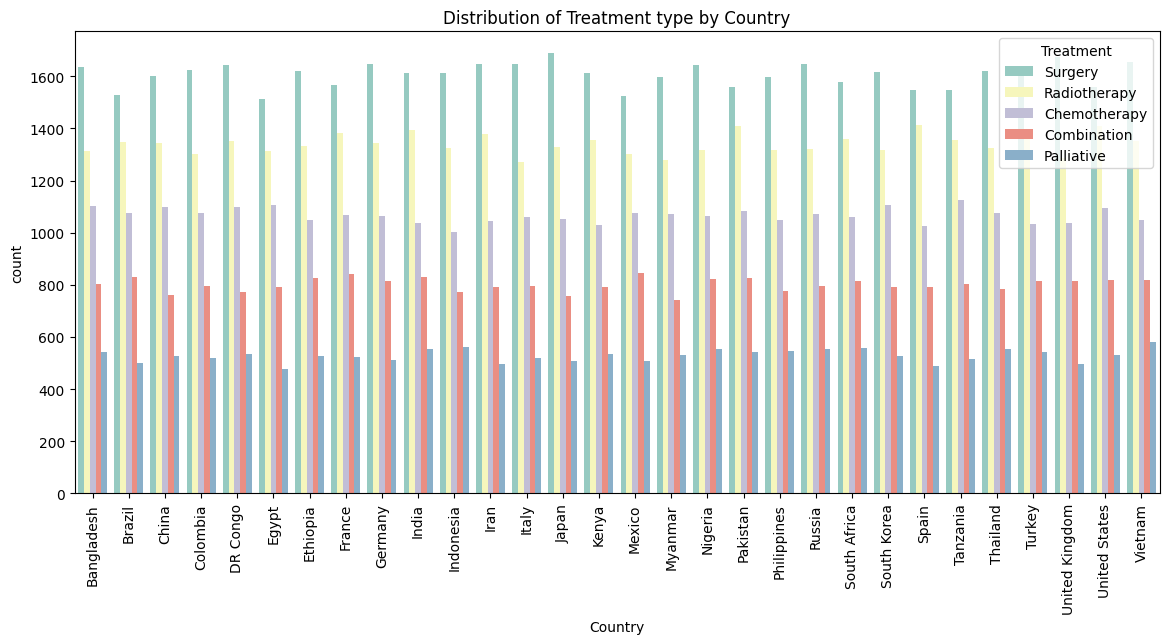

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create bar plot
sns.barplot(
    data=ctry_treatment_counts,
    x="country",
    y="count",
    hue="treatment_type",
    palette="Set3"
)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("count")
plt.title("Distribution of Treatment type by Country")
plt.xticks(rotation=90)  # Rotate country names for readability
plt.legend(title="Treatment")

# Show the plot
plt.show()

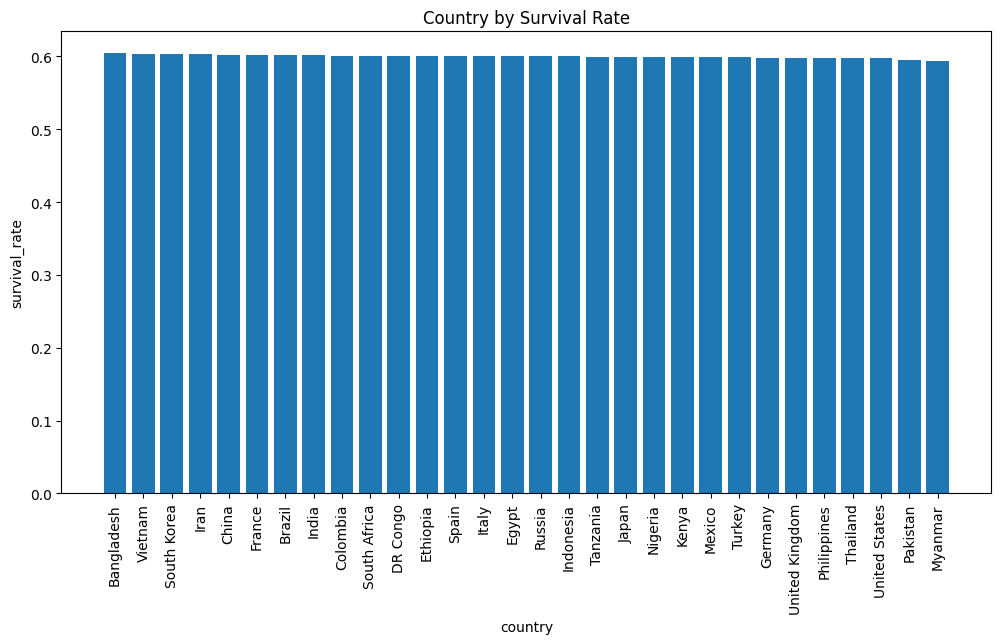

In [23]:
#checking for country and their survival rates
import matplotlib.pyplot as plt
ctry_survival_counts= df.groupby('country')['survival_rate'].mean().reset_index().sort_values(by='survival_rate', ascending=False)
plt.figure(figsize=(12,6))
plt.bar(ctry_survival_counts['country'], ctry_survival_counts['survival_rate'])
plt.xticks(rotation=90)
plt.title('Country by Survival Rate')
plt.xlabel('country')
plt.ylabel('survival_rate')
plt.show()

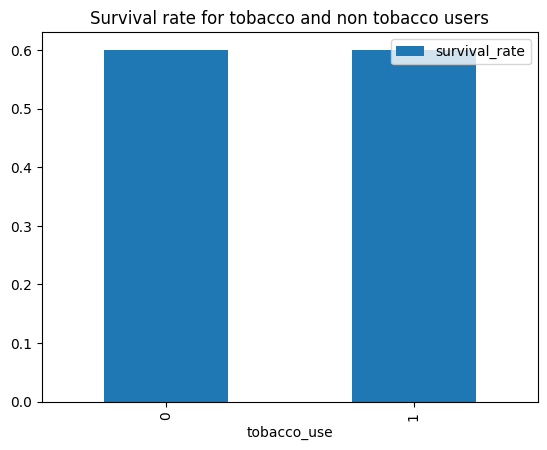

In [24]:
##Survival rate for tobacco and non tobacco users
df.groupby('tobacco_use')['survival_rate'].mean().reset_index().plot(kind='bar',
                                                                     x='tobacco_use', y='survival_rate',
                                                                     title= 'Survival rate for tobacco and non tobacco users')
plt.show()


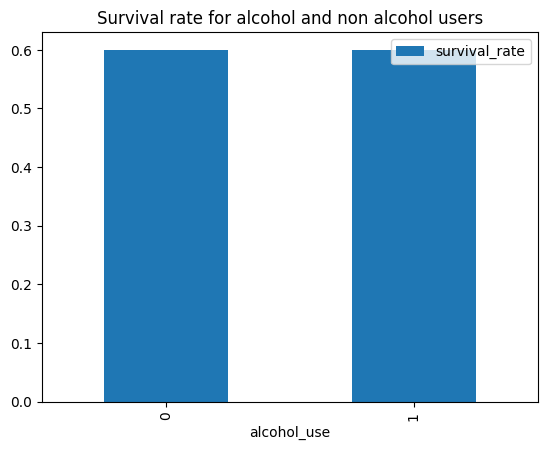

In [25]:
##Survival rate for tobacco and non tobacco users
df.groupby('alcohol_use')['survival_rate'].mean().reset_index().plot(kind='bar',
                                                                     x='alcohol_use', y='survival_rate',
                                                                     title= 'Survival rate for alcohol and non alcohol users')
plt.show()

<ipython-input-26-603746ffd363>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['treatment_type'], order=df['treatment_type'].value_counts().index, palette="Set3")


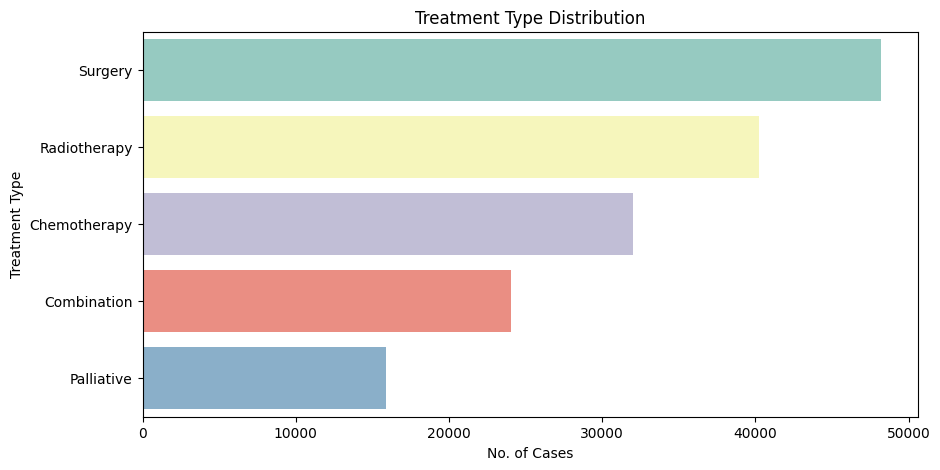

In [26]:
##Count of treatment type
plt.figure(figsize=(10, 5))
sns.countplot(y=df['treatment_type'], order=df['treatment_type'].value_counts().index, palette="Set3")
plt.xlabel("No. of Cases")
plt.ylabel("Treatment Type")
plt.title("Treatment Type Distribution")
plt.show()

<ipython-input-27-2509b94b2d75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['diagnosis_stage'], order=df['diagnosis_stage'].value_counts().index, palette="Set3")


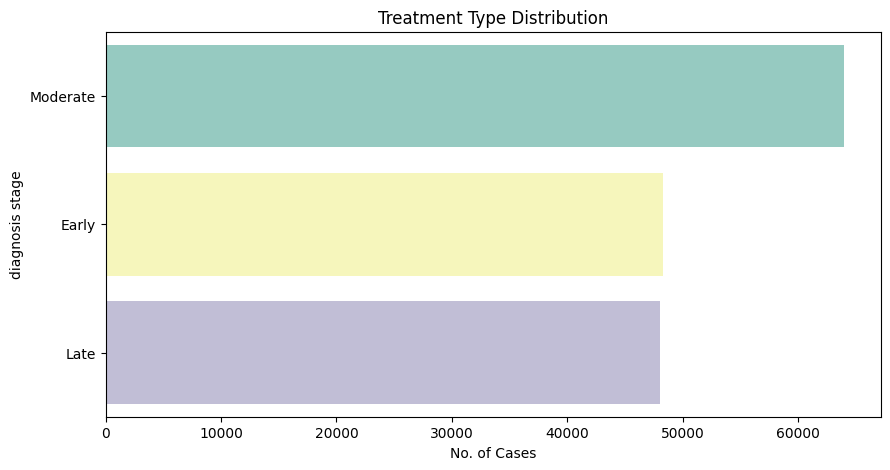

In [27]:
##Counts of dianosis stage
plt.figure(figsize=(10, 5))
sns.countplot(y=df['diagnosis_stage'], order=df['diagnosis_stage'].value_counts().index, palette="Set3")
plt.xlabel("No. of Cases")
plt.ylabel("diagnosis stage")
plt.title("Treatment Type Distribution")
plt.show()

<ipython-input-28-c0aa656b1acb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['socioeconomic_status'], order=df['socioeconomic_status'].value_counts().index, palette="Set3")


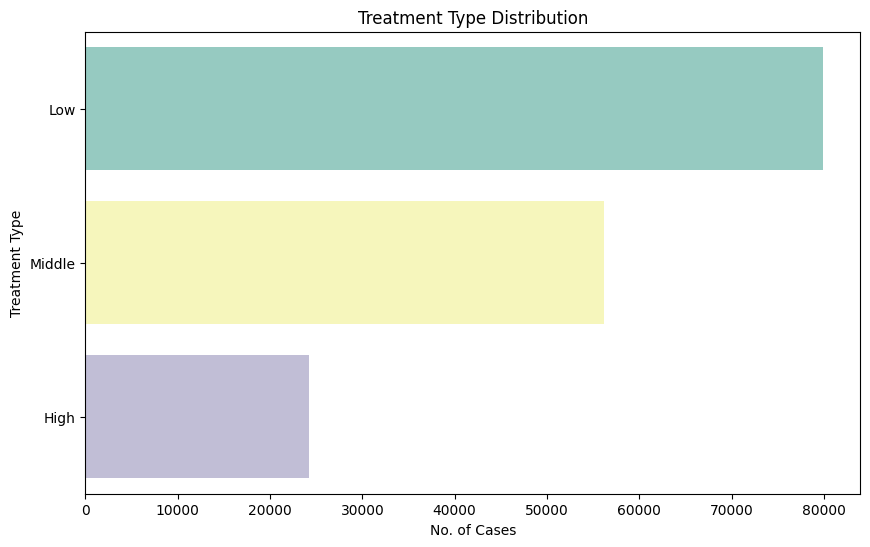

In [28]:
##Count of socioeconomic status
plt.figure(figsize=(10, 6))
sns.countplot(y=df['socioeconomic_status'], order=df['socioeconomic_status'].value_counts().index, palette="Set3")
plt.xlabel("No. of Cases")
plt.ylabel("Treatment Type")
plt.title("Treatment Type Distribution")
plt.show()

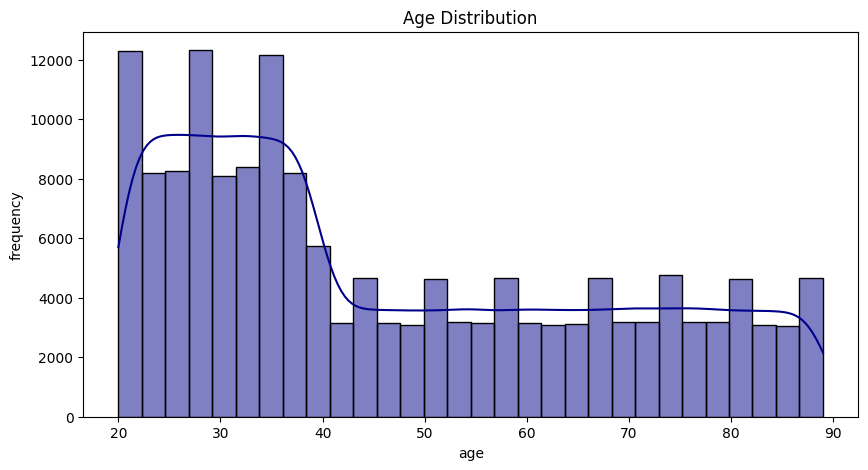

In [29]:
##Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True, color="darkblue")
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Age Distribution")
plt.show()

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error

In [31]:
# List of categorical columns for one-hot encoding
categorical_cols = ['socioeconomic_status', 'diagnosis_stage', 'treatment_type']
# Check if columns exist before applying get_dummies
if all(col in df.columns for col in categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    print("Some or all specified columns are not found in the DataFrame.")
df

,ID,country,gender,age,tobacco_use,alcohol_use,survival_rate,hpv_related,socioeconomic_status_Low,socioeconomic_status_Middle,diagnosis_stage_Late,diagnosis_stage_Moderate,treatment_type_Combination,treatment_type_Palliative,treatment_type_Radiotherapy,treatment_type_Surgery
0,1,Ethiopia,Male,34,1,1,0.826235,0,False,False,False,False,False,False,True,False
1,2,Turkey,Female,84,1,1,0.376607,0,False,False,False,True,False,False,True,False
2,3,Turkey,Female,62,1,1,0.736296,1,False,True,False,False,False,False,True,False
3,4,Tanzania,Male,48,1,1,0.786118,0,False,True,False,True,True,False,False,False
4,5,France,Male,26,1,1,0.830411,0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160287,160288,United Kingdom,Female,53,0,1,0.718270,0,False,True,True,False,True,False,False,False
160288,160289,Brazil,Female,81,0,0,0.765502,0,True,False,False,False,False,False,False,False
160289,160290,Nigeria,Male,59,0,1,0.349600,1,True,False,False,True,False,False,True,False
160290,160291,Philippines,Female,43,0,0,0.727410,1,False,False,False,True,False,False,False,False


In [32]:
##Categorical columns
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['country']=le.fit_transform(df['country'])
df['gender']=le.fit_transform(df['gender'])

In [33]:
# Convert any boolean columns to 0 and 1
for col in df.select_dtypes(include='bool'):
    df[col] = df[col].astype(int)
df

,ID,country,gender,age,tobacco_use,alcohol_use,survival_rate,hpv_related,socioeconomic_status_Low,socioeconomic_status_Middle,diagnosis_stage_Late,diagnosis_stage_Moderate,treatment_type_Combination,treatment_type_Palliative,treatment_type_Radiotherapy,treatment_type_Surgery
0,1,6,1,34,1,1,0.826235,0,0,0,0,0,0,0,1,0
1,2,26,0,84,1,1,0.376607,0,0,0,0,1,0,0,1,0
2,3,26,0,62,1,1,0.736296,1,0,1,0,0,0,0,1,0
3,4,24,1,48,1,1,0.786118,0,0,1,0,1,1,0,0,0
4,5,7,1,26,1,1,0.830411,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160287,160288,27,0,53,0,1,0.718270,0,0,1,1,0,1,0,0,0
160288,160289,1,0,81,0,0,0.765502,0,1,0,0,0,0,0,0,0
160289,160290,17,1,59,0,1,0.349600,1,1,0,0,1,0,0,1,0
160290,160291,19,0,43,0,0,0.727410,1,0,0,0,1,0,0,0,0


In [34]:
x = df.drop('survival_rate',axis=1)
y = df['survival_rate']

In [35]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =42)

In [36]:
# Assuming 'df' is your DataFrame
# Convert 'country' and 'gender' to categorical before creating X_train, X_test
for col in ['country', 'gender']:
    df[col] = df[col].astype('category')  # Convert to categorical data type

# Now split the data
x = df.drop('survival_rate',axis=1)
y = df['survival_rate']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state =42)


# Create a DMatrix (XGBoost-specific data structure)
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [37]:
params = {
    'booster': 'gbtree',  # Change to 'gbtree' or 'dart'
    'objective': 'reg:squarederror',
    'alpha': 0.1,
    'lambda': 1.0
}

In [38]:
# Train the model
model = xgb.train(params, dtrain, num_boost_round=1000)

# Make predictions
y_pred = model.predict(dtest)

In [39]:
from sklearn.metrics import r2_score

# R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: -0.16715603631626075


R^2 score indicates that the model is not seeing any pattern or is not capable of learning form the dataset in order to guess the survivial rate

In [40]:
# Set up the cross-validation parameters
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    nfold=5,
    metrics='rmse',
    early_stopping_rounds=15,
    as_pandas=True,
    seed=42
)


print(cv_results)

# The best number of boosting rounds based on cross-validation
best_num_boost_round = cv_results['test-rmse-mean'].idxmin()
print(f"Best number of boosting rounds: {best_num_boost_round}")

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.17282        0.000113           0.173       0.000465
Best number of boosting rounds: 0
